In [24]:
import numpy as np

np.random.seed(42)
num_samples = 20
x = np.random.uniform(1, 20, num_samples)

noise = np.random.normal(0, 3, num_samples)
y = 2*x + 1 + noise

data = np.column_stack((x, y))

print("x1, y")
for row in data:
    print(', '.join(map(str, row)))


x1, y
8.116262258099887, 14.194031155196502
19.063571821788408, 40.06988564136264
14.907884894416696, 28.09169756226976
12.374511199743695, 21.512111295481517
3.964354168406294, 13.325654643577248
3.96389588638785, 8.250462871316094
2.1035886311957896, 5.409761876455351
17.457346769723767, 31.640448980807165
12.421185223120967, 24.209222272666384
14.453378978124864, 30.239525725379327
1.3911053916202465, 0.3292300509735844
19.428287191077892, 40.9836684371928
16.816410175208013, 32.83090428065961
5.034443102887247, 10.193804956394663
4.4546743769349115, 8.104228917181633
4.484685687215243, 15.5262059279573
6.780602616231217, 14.520713558248632
10.97037220101252, 19.76761161515734
9.206955354200199, 21.881545444709964
6.533353663762797, 10.404176377612526


In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', label='Data')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Plot of x1 against y')

plt.show()

In [26]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable
model = LpProblem(name="small-problem")
a = LpVariable(name="a")
b = LpVariable(name="b")
eps = 0.1
xi = [LpVariable(name=f"xi_{i}", lowBound=0) for i in range(num_samples)]
# model += (2 * x + y <= 20, "red_constraint")
for i in range(num_samples):
    eps = 0.1
    model += (y[i] - (a * x[i] + b) <= xi[i] + eps, f"g1{i} constraint")
    model += (- y[i] + (a * x[i] + b) <= xi[i] + eps, f"g2{i} constraint")
for i in range(num_samples):
    model += lpSum([xi[i] for i in range(num_samples)])
print(model)


    

small-problem:
MINIMIZE
1*xi_0 + 1*xi_1 + 1*xi_10 + 1*xi_11 + 1*xi_12 + 1*xi_13 + 1*xi_14 + 1*xi_15 + 1*xi_16 + 1*xi_17 + 1*xi_18 + 1*xi_19 + 1*xi_2 + 1*xi_3 + 1*xi_4 + 1*xi_5 + 1*xi_6 + 1*xi_7 + 1*xi_8 + 1*xi_9 + 0
SUBJECT TO
g10_constraint: - 8.1162622581 a - b - xi_0 <= -14.0940311552

g20_constraint: 8.1162622581 a + b - xi_0 <= 14.2940311552

g11_constraint: - 19.0635718218 a - b - xi_1 <= -39.9698856414

g21_constraint: 19.0635718218 a + b - xi_1 <= 40.1698856414

g12_constraint: - 14.9078848944 a - b - xi_2 <= -27.9916975623

g22_constraint: 14.9078848944 a + b - xi_2 <= 28.1916975623

g13_constraint: - 12.3745111997 a - b - xi_3 <= -21.4121112955

g23_constraint: 12.3745111997 a + b - xi_3 <= 21.6121112955

g14_constraint: - 3.96435416841 a - b - xi_4 <= -13.2256546436

g24_constraint: 3.96435416841 a + b - xi_4 <= 13.4256546436

g15_constraint: - 3.96389588639 a - b - xi_5 <= -8.15046287132

g25_constraint: 3.96389588639 a + b - xi_5 <= 8.35046287132

g16_constraint: - 2.10358

c:\Users\ASUS\Desktop\pyprojects\Uni_codes\.venv\Lib\site-packages\pulp\pulp.py:1668: UserWarning: Overwriting previously set objective.
  warnings.warn("Overwriting previously set objective.")


In [27]:
status = model.solve()

In [29]:
print(f"status: {model.status}, {LpStatus[model.status]}")

print(f"objective: {model.objective.value()}")

for var in model.variables():
    print(f"{var.name}: {var.value()}")
    if var.name == 'a':
        a = var.value()
    if var.name == 'b':
        b = var.value()
        
for name, constraint in model.constraints.items():
    print(f"{name}: {constraint.value()}")


status: 1, Optimal
objective: 40.056399799
a: 1.9125006
b: 0.56950957
xi_0: 1.7978349
xi_1: 2.9412833
xi_10: 2.8007694
xi_11: 3.1575478
xi_12: 0.0
xi_13: 0.0
xi_14: 0.88484812
xi_15: 6.2797322
xi_16: 0.88329735
xi_17: 1.6827415
xi_18: 3.6037281
xi_19: 2.5603761
xi_2: 0.88915096
xi_3: 2.6236585
xi_4: 5.0743153
xi_5: 0.0
xi_6: 0.71713776
xi_7: 2.2162469
xi_8: 0.015811609
xi_9: 1.92792
g10_constraint: -3.7956697531768873
g20_constraint: -4.6823111832239306e-08
g11_constraint: 2.2404921251606424e-07
g21_constraint: -6.082566824049215
g12_constraint: -1.9783017730331103
g22_constraint: -1.4696689276672004e-07
g13_constraint: -5.447316868735021
g23_constraint: -1.3126498243920537e-07
g14_constraint: 4.788770979757828e-08
g24_constraint: -10.34863064788771
g15_constraint: 4.026179845073585e-08
g25_constraint: -0.20000004026179774
g16_constraint: 2.7140224401200896e-08
g26_constraint: -1.6342755471402235
g17_constraint: -4.632493660697603
g27_constraint: -1.3930239983750425e-07
g18_constraint:

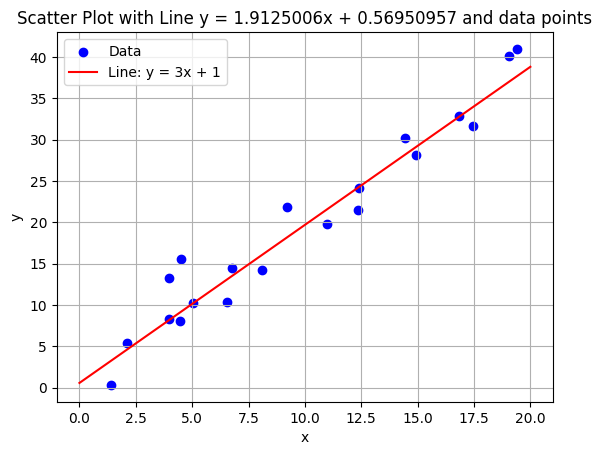

In [35]:
import matplotlib.pyplot as plt
plt.scatter(x, y, color='blue', label='Data')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of x against y')

x_line = np.linspace(0, 20, 1000)
y_line = a * x_line + b
plt.plot(x_line, y_line, color='red', label='Line: y = 3x + 1')

plt.title(f'Scatter Plot with Line y = {a}x + {b} and data points')
plt.grid(True)
plt.legend()
plt.show()